In [100]:
import pandas as pd
import requests
from urllib.parse import urlencode
import matplotlib.pyplot as plt

In [78]:
def url_ydisk (url):    
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = url
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url    

## Описание данных
Имеются следующие переменные:

- Hotel – тип отеля (City Hotel или Resort Hotel)  
- Is canceled – бронирование было отменено (1) или нет (0); не отмененное считается успешным
- Lead time – количество дней, прошедших между датой бронирования и датой прибытия  
- Arrival full date – полная дата прибытия
- Arrival date year – год прибытия  
- Arrival date month – месяц прибытия  
- Arrival date week number – номер недели прибытия
- Arrival date day of month – день прибытия
- Stays in weekend nights – количество выходных (суббота или воскресенье), которые гость забронировал для проживания в отеле
- Stays in week nights – количество дней (с понедельника по пятницу), которые гость забронировал для проживания в отеле
- Stays total nights – общее число забронированных ночей (сумма двух предыдущих колонок)
- Adults – число взрослых
- Children – число детей
- Babies – число младенцев 
- Meal – выбранный тип питания
- Country – страна происхождения клиента
- Reserved room type – тип зарезервированного номера
- Assigned room type – тип полученного номера (может отличаться от забронированного)
- Customer type – тип бронирования
- Reservation status – значение последнего статуса брони: Canceled - было отменено клиентом; Check-Out - клиент зарегистрировался, но уже покинул отель; No-Show - клиент не зарегистрировался и сообщил администрации отеля причину
- Reservation status date – дата обновления статуса

### 1 задание
Сохраните прочитанный датасет в bookings и затем запишите первые 7 строк в переменную bookings_head. Посмотрите на размеры таблицы. Сколько всего в ней столбцов? К какому типу/каким типам относится большинство переменных?

In [79]:
bookings = pd.read_csv(url_ydisk('https://disk.yandex.ru/d/Nht7d9-6n5sXwQ'), sep=';')
bookings.head(7)

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-03


In [80]:
#кол-во столбцов
columns_num = bookings.shape[1]
columns_num

21

In [81]:
#типы большинства переменных
often_types = bookings.dtypes.value_counts()
often_types

int64      10
object     10
float64     1
dtype: int64

Ответ: Большинство переменных относится к типам int64 и object.

### 2 задание
Приведите названия колонок к нижнему регистру и замените пробелы на знак нижнего подчеркивания.

In [83]:
#bookings.columns = list(map(lambda col: col.lower().replace(' ', '_'), bookings.columns))
#bookings.columns = [i.replace(' ', '_').lower() for i in bookings.columns]
bookings.columns = bookings.columns.str.replace(' ', '_').str.lower()

### 3 задание
Пользователи из каких стран совершили наибольшее число успешных бронирований? Укажите топ-5.

In [98]:
# Подсчет успешных бронеирований для каждой страны
top5_success_reserves = bookings.query('is_canceled == 0') \
    .groupby('country', as_index=False) \
    .agg({'hotel':'count'}) \
    .rename(columns={'hotel':'successful_reserves'}) \
    .sort_values('successful_reserves', ascending=False)

top5_success_reserves.head(5)

,country,successful_reserves
125,PRT,21071
57,GBR,9676
54,FRA,8481
50,ESP,6391
42,DEU,6069


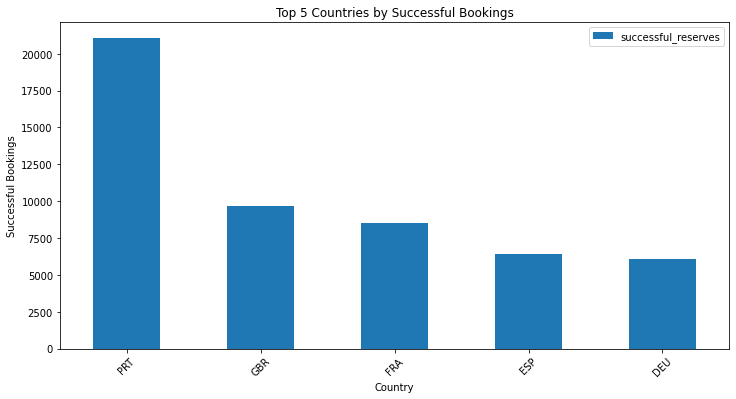

In [102]:
# Создание диаграммы
top5_success_reserves.head(5).plot(kind='bar', x='country', y='successful_reserves', figsize=(12, 6))
plt.title('Top 5 Countries by Successful Bookings')
plt.xlabel('Country')
plt.ylabel('Successful Bookings')
plt.xticks(rotation=45)  
plt.show()


Ответ: Пользователи из PRT, GBR, FRA, ESP, DEU совершили наибольшее число успешных бронирований.

### 4 задание
На сколько ночей (stays_total_nights)  в среднем бронируют отели типа City Hotel? Resort Hotel? Запишите полученные значения в пропуски с точностью до 2 знаков после точки.

In [24]:
mean_stays = bookings.groupby('hotel', as_index=False) \
    .agg({'stays_total_nights':'mean'}) \
    .rename(columns={'stays_total_nights':'avg_stays_total_nights'}) 

round(mean_stays, 2)

,hotel,avg_stays_total_nights
0,City Hotel,2.98
1,Resort Hotel,4.32


Ответ: На 2.98 ночи в среднем бронируют отели типа City Hotel. И 4.32 - отели типа Resort Hotel.

### 5 задание
Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга. Сколько подобных наблюдений встретилось в датасете?

In [25]:
overbooking = bookings.query('reserved_room_type != assigned_room_type').shape[0]
overbooking

14917

Ответ: В датасете встретилось 14917 наблюдения, связанных с овербукингом.

### 6 задание
Проанализируйте даты запланированного прибытия (сравните популярные месяцы). 

In [27]:
#месяц, в который чаще всего успешно оформляли бронь в 2016
greatest_2016 = bookings.query('arrival_date_year == 2016') \
    .groupby('arrival_date_month') \
    .agg({'arrival_full_date':'count'}) \
    .rename(columns={'arrival_full_date':'month_reserves'}) \

greatest_2016.idxmax()

month_reserves    October
dtype: object

In [7]:
#месяц, в который чаще всего успешно оформляли бронь в 2017
greatest_2017 = bookings.query('arrival_date_year == 2017') \
    .groupby('arrival_date_month') \
    .agg({'arrival_full_date':'count'}) \
    .rename(columns={'arrival_full_date':'month_reserves'}) \

greatest_2017.idxmax()

month_reserves    May
dtype: object

**Вывод по анализу дат запланированного прибытия:**

- На какой месяц чаще всего успешно оформляли бронь в 2016?

В 2016 чаще всего успешно оформляли бронь в октябре.

- Изменился ли самый популярный месяц в 2017?

Да, изменился: в 2017 чаще всего успешно оформляли бронь в мае.

Сгруппируем данные и сравним, как ведут себя отмененные бронирования в разбивке по временным промежуткам и видам отелей.

In [29]:
#месяц, когда брони отменялись чаще всего в каждый из периодов
canceled_city_hotel = bookings.query('is_canceled == 1') \
    .groupby(['arrival_date_year', 'arrival_date_month', 'hotel']) \
    .agg({'arrival_full_date':'count'}) \
    .rename(columns={'arrival_full_date':'total_canceled'})

canceled_city_hotel

total_canceled
arrival_date_year arrival_date_month hotel                       
2015              August             City Hotel              1232
                                     Resort Hotel             366
                  December           City Hotel               668
                                     Resort Hotel             305
                  July               City Hotel               939
                                     Resort Hotel             320
                  November           City Hotel               301
                                     Resort Hotel             185
                  October            City Hotel              1321
                                     Resort Hotel             411
                  September          City Hotel              1543
                                     Resort Hotel             551
2016              April              City Hotel              1539
                                     Resort Hotel             522
                  August             City Hotel              1247
                                     Resort Hotel             578
                  December           City Hotel              1072
                                     Resort Hotel             326
                  February           City Hotel               930
                                     Resort Hotel             407
                  January            City Hotel               438
                                     Resort Hotel             119
                  July               City Hotel              1043
                                     Resort Hotel             456
                  June               City Hotel              1720
                                     Resort Hotel             376
                  March              City Hotel              1108
                                     Resort Hotel             369
                  May                City Hotel              1436
                                     Resort Hotel             479
                  November           City Hotel              1360
                                     Resort Hotel             276
                  October            City Hotel              1947
                                     Resort Hotel             567
                  September          City Hotel              1567
                                     Resort Hotel             455
2017              April              City Hotel              1926
                                     Resort Hotel             537
                  August             City Hotel              1123
                                     Resort Hotel             693
                  February           City Hotel               971
                                     Resort Hotel             388
                  January            City Hotel              1044
                                     Resort Hotel             206
                  July               City Hotel              1324
                                     Resort Hotel             660
                  June               City Hotel              1808
                                     Resort Hotel             631
                  March              City Hotel              1278
                                     Resort Hotel             394
                  May                City Hotel              2217
                                     Resort Hotel             545

Можно сделать вывод о том, что посетители отелей типа City Hotel отменяют бронирования чаще, чем  посетители отелей типа Resort Hotel. Почему так вышло?

Ответ строкой ниже: в датасете бронирований отелей типа City Hotel почти в 2 раза больше, оттого и отмен соответственно выходит больше.

In [32]:
bookings.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

А теперь сгруппируем данные по годам и посмотрим, на какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов.

In [33]:
#месяц, когда брони отменялись чаще всего в каждый из периодов
canceled_city_hotel = bookings.query('is_canceled == 1 and hotel == "City Hotel"') \
    .groupby(['arrival_date_year', 'arrival_date_month']) \
    .agg({'arrival_full_date':'count'}) \
    .rename(columns={'arrival_full_date':'total_canceled'}) \
    .sort_values('total_canceled', ascending=False)

canceled_city_hotel.head()

total_canceled
arrival_date_year arrival_date_month                
2017              May                           2217
2016              October                       1947
2017              April                         1926
                  June                          1808
2016              June                          1720

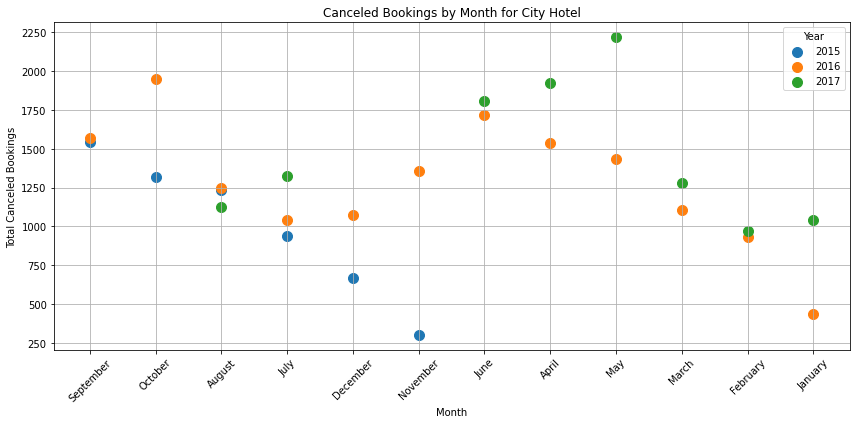

In [106]:
# Создание диаграммы
fig, ax = plt.subplots(figsize=(12, 6))

# Построение скаттерплота для каждого года с увеличенным размером точек
for year, data in canceled_city_hotel.groupby(level=0):
    ax.scatter(data.index.get_level_values(1), data['total_canceled'], s=100, label=year)

# Настройка оформления
ax.set_title('Canceled Bookings by Month for City Hotel')
ax.set_xlabel('Month')
ax.set_ylabel('Total Canceled Bookings')
ax.legend(title='Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

### 7 задание
Посмотрите на числовые характеристики трёх переменных: adults, children и babies. Какая из них имеет наибольшее среднее значение?

In [37]:
bookings[['adults', 'children', 'babies']].describe()

,adults,children,babies
count,119390.000000,119386.000000,119390.000000
mean,1.856403,0.103890,0.007949
std,0.579261,0.398561,0.097436
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,55.000000,10.000000,10.000000


In [39]:
bookings[['adults', 'children', 'babies']].mean().idxmax()

'adults'

Переменная adults имеет наибольшее среднее значение.

### 8 задание
Создайте колонку total_kids, объединив children и babies. Для отелей какого типа среднее значение переменной оказалось наибольшим? В качестве ответа укажите наибольшее среднее total_kids, округлив до 2 знаков после точки.

In [41]:
bookings['total_kids'] = bookings.children + bookings.babies

In [47]:
kids_mean = bookings.groupby('hotel') \
    .agg({'total_kids':'mean'}) \
    .rename(columns={'total_kids':'mean_value'}) \
    .sort_values('mean_value', ascending=False)

kids_mean

,mean_value
hotel,
Resort Hotel,0.142586
City Hotel,0.096311


In [48]:
max_kids_mean = round(kids_mean.iloc[0, 0], 2)
max_kids_mean

0.14

### 9 задание
Создайте переменную has_kids, которая принимает значение True, если клиент при бронировании указал хотя бы одного ребенка (total_kids), в противном случае – False. Посчитайте отношение количества ушедших пользователей к общему количеству клиентов, выраженное в процентах (churn rate). Укажите, среди какой группы показатель выше.

In [61]:
bookings['has_kids'] = bookings.total_kids > 0

In [62]:
#кол-во ушедших в каждой группе
canceled_each_group = bookings.query('is_canceled == 1') \
    .groupby('has_kids') \
    .agg({'hotel':'count'}) \
    .rename(columns={'hotel':'canceled_reserves'}) 

canceled_each_group

,canceled_reserves
has_kids,
False,40965
True,3259


In [63]:
#общее кол-во в каждой группе
total_each_group = bookings.groupby('has_kids') \
    .agg({'hotel':'count'}) \
    .rename(columns={'hotel':'total_reserves'}) 

total_each_group

,total_reserves
has_kids,
False,110058
True,9332


In [64]:
#объедимним таблицы
full_data = canceled_each_group.merge(total_each_group, on='has_kids')

In [66]:
# расчитаем churn_rate
full_data['churn_rate'] = round(full_data.canceled_reserves / full_data.total_reserves * 100, 2)
full_data

,canceled_reserves,total_reserves,churn_rate
has_kids,,,
False,40965,110058,37.22
True,3259,9332,34.92


In [67]:
full_data.churn_rate.idxmax()

False

Среди пользователей, у которых не указано в бронировании детей, показатель churn_rate (отношение количества ушедших пользователей к общему количеству клиентов) больше, чем у пользователей, которые указали одно и более ребенка. 